# Prediction and Evaluation
Primary sound to predict is myself saying the words the model knows, my domain knowledge of english will confirm my suspicions.  Secondary prediction category is myself saying words unclearly and with background noise or inflection, if model predicts well it shows robustness and if she predicts poorly perhaps it will yield a pattern.  Third category is nonverbal universal sounds in order to interpret category four; images. 

In [213]:
#imports required for functionality
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import yaml
from keras.models import load_model
from keras.preprocessing import image
from sklearn.preprocessing import StandardScaler

### imports
Retreive model and category dictionary for efficient evaluation of wild data

In [80]:
#import word to output_value for category interpretation
categories = open('category.py', 'r')
cats =categories.read()
categories.close()
targets =yaml.load(cats)
#targets

In [ ]:
#for quicker output interpretation
def give_word(number):
    return {k for k, v in targets.items() if v == number}

In [4]:
#import model for predictions
model = load_model('model.h5')
#which words had the best and worst predictions
#confusion matrix?

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


## wild audio
My first true validations were self recordings of the same words from the dataset.  Below is me saying "right"

In [6]:
#predict on wild words
right, sr = librosa.load('../data/rest/me_right.wav')
ipd.Audio(right, rate =sr)

In [53]:
#convenient way to get a spectogram
def spec(signal):
    R = librosa.feature.melspectrogram(signal)
    log_R = librosa.power_to_db(R, ref=np.max)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(log_R, x_axis='time', y_axis='mel')
    plt.title('Mel Spectogram')
    plt.tight_layout()

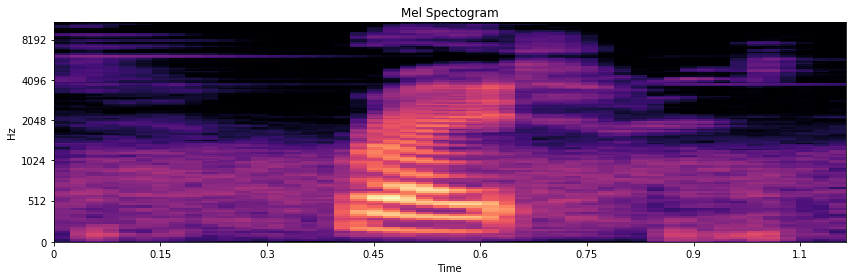

In [54]:
spec(right)

### various durations
Adding some lines to calculate through hop length help process files longer than a second, since the model is trained for (44, 128) shapes.

In [173]:
#function to give a wild sound and get the predictions
def predict (signal):
    # hop length to normalize array so clips can be different lengths
    hop = (len(signal) / sr)
    new_hop =hop *506
    hop_len =round(new_hop)
    N = librosa.feature.melspectrogram(signal, hop_length=hop_len).T 
    log_N = librosa.power_to_db(N, ref=np.max)  
    array = np.reshape(log_N, (-1, 44, 128)) 
    plt.figure(figsize=(8, 3))
    librosa.display.specshow(log_N)
    pred =model.predict(array)
    probs = np.argsort(pred)
    word =np.argmax(pred)
    print(give_word(word))
    fig, ax =plt.subplots(figsize =(10, 5))
    fig = plt.imshow(pred)
    fig.axes.get_yaxis().set_visible(False)

### examples
Input into the predict finction the signal array and it will show the spectogram the way the model sees it, the predicted word, and the prediction cartainty probability visualized as a color bar.

{'right'}


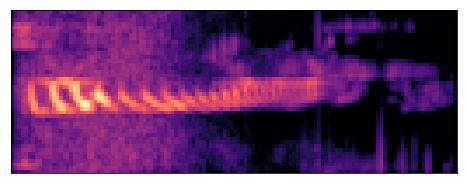

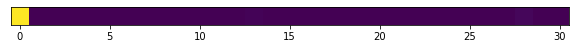

In [174]:
#prediction in brackets, spectogram, and intensity bar of probability
predict(right);

{'dog'}


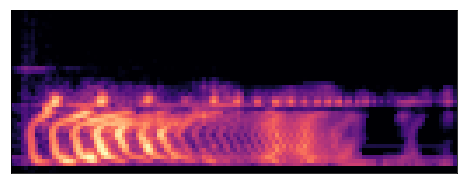

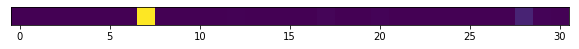

In [175]:
#predict on emotional words, not as clear, this one is.
dog, sr = librosa.load('../data/rest/dogq.wav')
predict(dog)

### not as certain
Here you see the certainty is divided in the color bar because this is a four second clip compressed into one second.  And yet the prediction is still correct.

{'one'}


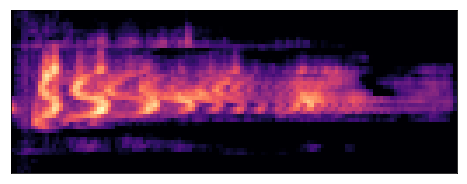

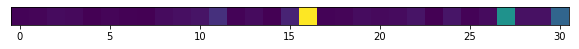

In [176]:
#not as clear, sped up timeframe
one, sr = librosa.load('../data/rest/me_one_ah.wav')
predict(one)

## just sound
I predict some wordless sounds in order to get a more abstract breakdown of how the model classifies regardless of language content.  Examples here are a quiet breath, a cry, and a laugh.  They show elements of silence, tone, and rhythm respectively.

{'up'}


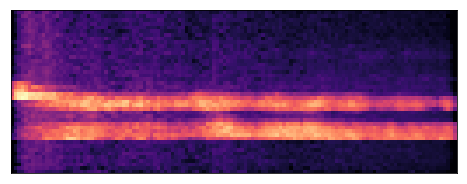

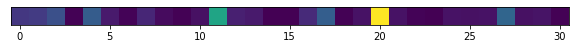

In [177]:
#closest to silence and the most even spread of sound yet
whisper, sr = librosa.load('../data/rest/whisp.wav')
predict(whisper)

{'eight'}


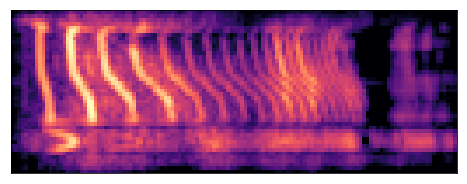

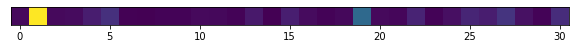

In [178]:
#cry
wail, sr = librosa.load('../data/rest/wail.wav')
predict(wail)

{'up'}


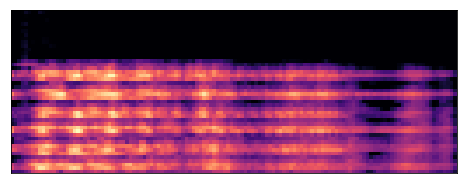

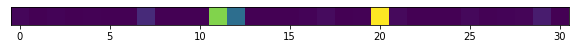

In [179]:
#laugh
laugh, sr = librosa.load('../data/rest/laugh.wav')
predict(laugh)

## quiet
Helpful also to see the range of probabilities and not only the word class that has the highest.

In [106]:
def predict_range (signal):
    hop = (len(signal) / sr)
    new_hop =hop *506
    hop_len =round(new_hop)
    N = librosa.feature.melspectrogram(signal, hop_length=hop_len).T 
    log_N = librosa.power_to_db(N, ref=np.max)  
    array = np.reshape(log_N, (-1, 44, 128)) 
    pred =model.predict(array)
    print(np.argsort(pred))

In [201]:
#range lowest to highest of whisper
predict_range(whisper)

[[15 14 23  3 18  9 30 22  6  8 28 25 10 24 19 21 26 29 13  5 12  7 16  0
   1  2  4 17 27 11 20]]


In [200]:
give_word(19)

{'seven'}

up, left, on, bird, bed ... tree, house, sheila
>The laugh also begins with the highest probability for 'up', then 'left', and the cry tone goes from 'eight' to 'seven'.

## images
Not as interpretable but interesting that it is easily done.  A way to measure the similarity between auditory pressure visualization and visual art, which are both read as a whole.

In [171]:
def image_pred(filepath):
    picture =image.load_img(filepath, target_size=(44, 128))
    picture_array =image.img_to_array(picture)
    greyscale = picture_array[:,:,0]
    picture_input = greyscale.reshape(-1, 44, 128)
    picture_predict = model.predict(picture_input)
    word =np.argmax(picture_predict)
    print(give_word(word))
    fig = plt.imshow(picture_predict)
    fig.axes.get_yaxis().set_visible(False)

{'stop'}


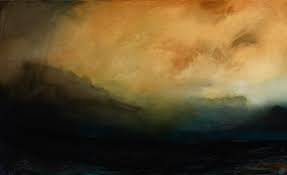

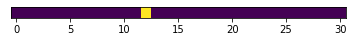

In [172]:
image_pred('../data/rest/images.jpeg');
image.load_img('../data/rest/images.jpeg')

In [218]:
#what about as spectogram?
def spec_image(filepath):
    #to greyscale
    picture =image.load_img(filepath, target_size=(44, 128))
    picture_array =image.img_to_array(picture)
    greyscale = picture_array[:,:,0]
    #scale image
    ss =StandardScaler()
    art_sc = ss.fit_transform(greyscale)
    b =librosa.power_to_db(art_sc, ref=np.max).T
    array = np.reshape(b, (-1, 44, 128)) 
    pred =model.predict(array)
    word =np.argmax(pred)
    print(give_word(word))
    librosa.display.specshow(b)
 #   art =librosa.power_to_db(greyscale, ref=np.max)
 #   librosa.display.specshow(art, sr=sr_r, x_axis='time', y_axis='mel');

{'stop'}


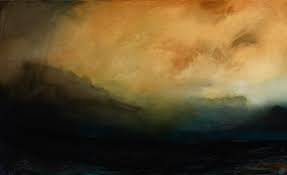

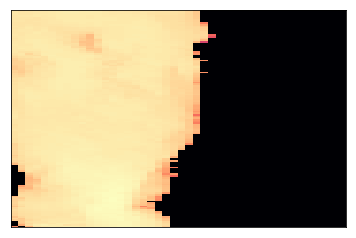

In [219]:
#painting compared to how the model sees it.
spec_image('../data/rest/images.jpeg');
image.load_img('../data/rest/images.jpeg')

{'one'}


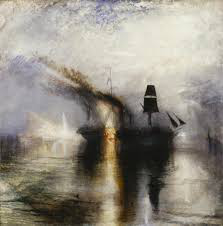

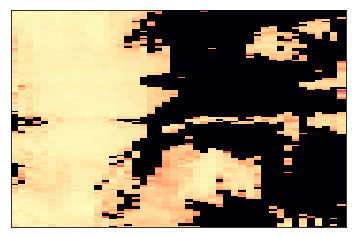

In [224]:
spec_image('../data/rest/boat.jpeg')
image.load_img('../data/rest/boat.jpeg')

{'five'}


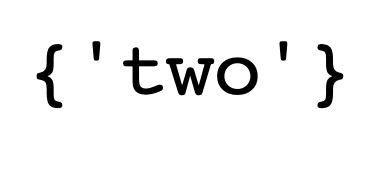

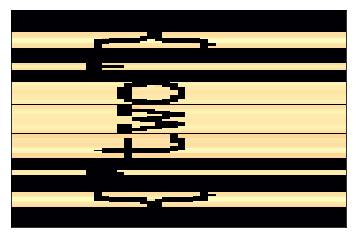

In [225]:
# and finally its own output on a familiar form.  Almost got it.
spec_image('../data/rest/two.jpeg')
image.load_img('../data/rest/two.jpeg')